In [ ]:
import torch
from PIL import Image
from torchvision import transforms
import os

os.system("wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt")

model = torch.hub.load('pytorch/vision:v0.10.0', , pretrained=True)
model.eval()


In [25]:

def inference(input_image):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalization with mean and std of imagenet
    ])
    input_tensor = preprocess(input_image) # preprocess with expected parameter for resnet50 with imagenet weights
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model


    with torch.no_grad():
        output = model(input_batch)
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

    # Read the categories
    with open("data/imagenet_classes.txt", "r") as f:
        categories = [s.strip() for s in f.readlines()]
    # Show top categories per image
    top5_prob, top5_catid = torch.topk(probabilities, 1)
    result = {}
    for i in range(top5_prob.size(0)):
        result[categories[top5_catid[i]]] = top5_prob[i].item()
    return result

In [26]:
img = Image.open("data/images/grapes.jpg")
inference(img)

{'Granny Smith': 0.33996477723121643}

{'Samoyed': 0.8732959032058716, 'Pomeranian': 0.03027082420885563, 'white wolf': 0.019671205431222916, 'keeshond': 0.01107352040708065, 'Eskimo dog': 0.009204281494021416}


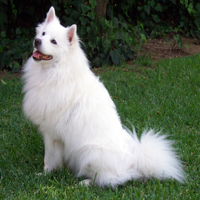

In [24]:
img = Image.open("data/images/dog.jpg")
result = inference(img)

print(result)

img.resize((200,200))